# Hong Kong Pollution & Weather: EDA

## 1. Load Required Python Packages

In [1]:
# load python packages from environment
import os
import urllib.request
import seaborn as sns
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

<b>Locate and print current working directory.</b>

In [20]:
path = os.getcwd()
parent = os.path.dirname(path)
print(path)
print(parent)

/Users/tiffanyflor/Dropbox/MyProjects/HongKongPollution/HongKongPollution/notebooks
/Users/tiffanyflor/Dropbox/MyProjects/HongKongPollution/HongKongPollution


<b>Get parent directory and append path to processed data.</b>

In [3]:
# Create raw data path by getting parent directory of current working directory and appending data/processed
parent_path = os.path.dirname(path)
processeddata_path = os.path.join(parent_path, 'data', 'interim')
print(processeddata_path)

/Users/tiffanyflor/Dropbox/MyProjects/HongKongPollution/HongKongPollution/data/interim


## 2. Load Pollution Data into DataFrame

In [4]:
max_pollution = pd.read_csv(processeddata_path+'/daily_max_pollution.csv',index_col=0)

In [5]:
max_pollution.head()

,Date,Hour,Central/Western,Eastern,Kwun Tong,Sham Shui Po,Kwai Chung,Tsuen Wan,Yuen Long,Tuen Mun,Tung Chung,Tai Po,Sha Tin,Causeway Bay,Central,Mong Kok
0,2014-01-01,Daily Max,8.0,7.0,9.0,8.0,7.0,7.0,7.0,8.0,7.0,6.0,7.0,10.0,8.0,9.0
1,2014-01-02,Daily Max,7.0,6.0,7.0,8.0,6.0,7.0,7.0,8.0,7.0,5.0,6.0,9.0,7.0,8.0
2,2014-01-03,Daily Max,9.0,9.0,11.0,11.0,11.0,11.0,11.0,10.0,10.0,10.0,11.0,11.0,11.0,11.0
3,2014-01-04,Daily Max,9.0,8.0,9.0,8.0,9.0,9.0,9.0,9.0,10.0,8.0,9.0,11.0,10.0,9.0
4,2014-01-05,Daily Max,8.0,8.0,9.0,9.0,8.0,9.0,8.0,9.0,9.0,7.0,9.0,9.0,9.0,9.0


In [6]:
mong_kok_poll = max_pollution[['Date','Mong Kok']]

In [7]:
mong_kok_poll.head()

,Date,Mong Kok
0,2014-01-01,9.0
1,2014-01-02,8.0
2,2014-01-03,11.0
3,2014-01-04,9.0
4,2014-01-05,9.0


In [8]:
mong_kok_poll.rename(columns={'Mong Kok':'Daily Max AQHI'},inplace=True)

/Users/tiffanyflor/opt/anaconda3/envs/hkpollution3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### Map Pollution Rating to Health Risk Categories

In [9]:
aqhi_mapper = {1.0:'Low',
               2.0:'Low',
               3.0:'Low',
               4.0:'Moderate',
               5.0:'Moderate',
               6.0:'Moderate',
               7.0:'High',
               8.0:'Very High',
               9.0:'Very High',
               10.0:'Very High',
               11.0:'Serious'}

mong_kok_poll['AQHI Health Risk']=mong_kok_poll['Daily Max AQHI'].map(aqhi_mapper)

<ipython-input-9-f4adef811f53>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mong_kok_poll['AQHI Health Risk']=mong_kok_poll['Daily Max AQHI'].map(aqhi_mapper)


In [10]:
mong_kok_poll.head()

,Date,Daily Max AQHI,AQHI Health Risk
0,2014-01-01,9.0,Very High
1,2014-01-02,8.0,Very High
2,2014-01-03,11.0,Serious
3,2014-01-04,9.0,Very High
4,2014-01-05,9.0,Very High


In [11]:
mong_kok_poll['Date'] = pd.to_datetime(mong_kok_poll['Date'])
mong_kok_poll['AQHI Health Risk'] = mong_kok_poll['AQHI Health Risk'].astype('category')

<ipython-input-11-49c0a06b9637>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mong_kok_poll['Date'] = pd.to_datetime(mong_kok_poll['Date'])
<ipython-input-11-49c0a06b9637>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mong_kok_poll['AQHI Health Risk'] = mong_kok_poll['AQHI Health Risk'].astype('category')


In [12]:
mong_kok_poll.dtypes

Date                datetime64[ns]
Daily Max AQHI             float64
AQHI Health Risk          category
dtype: object

In [13]:
mong_kok_poll.tail()

,Date,Daily Max AQHI,AQHI Health Risk
2368,2020-06-26,3.0,Low
2369,2020-06-27,3.0,Low
2370,2020-06-28,3.0,Low
2371,2020-06-29,3.0,Low
2372,2020-06-30,3.0,Low


### Examine Pollution Summary Statistics

In [14]:
mong_kok_poll.shape

(2373, 3)

In [15]:
mong_kok_poll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2373 entries, 0 to 2372
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2373 non-null   datetime64[ns]
 1   Daily Max AQHI    2373 non-null   float64       
 2   AQHI Health Risk  2373 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 58.1 KB


In [16]:
mong_kok_poll.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Max AQHI,2373.0,4.900126,1.605131,2.0,4.0,5.0,6.0,11.0


In [17]:
mong_kok_poll.describe(include=['category']).T

,count,unique,top,freq
AQHI Health Risk,2373,5,Moderate,1631


array([[<AxesSubplot:title={'center':'Daily Max AQHI'}>]], dtype=object)

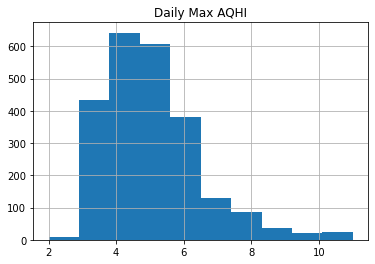

In [18]:
mong_kok_poll.hist()

## 3. Load Pollution Data into DataFrame

In [59]:
import datetime
hourly_df = pd.read_csv(parent+'/data/interim/hourly_pollution.csv', index_col=1)
hourly_df = hourly_df.drop(['Unnamed: 0','Hour'], axis=1)
hourly_df.index = pd.to_datetime(hourly_df.index)
hourly_df.head()

,Central/Western,Eastern,Kwun Tong,Sham Shui Po,Kwai Chung,Tsuen Wan,Yuen Long,Tuen Mun,Tung Chung,Tai Po,Sha Tin,Causeway Bay,Central,Mong Kok
Date,,,,,,,,,,,,,,
2014-01-01,6.0,7.0,9.0,8.0,6.0,6.0,6.0,8.0,6.0,6.0,6.0,10.0,7.0,9.0
2014-01-01,6.0,7.0,9.0,7.0,6.0,5.0,6.0,8.0,5.0,5.0,6.0,10.0,7.0,9.0
2014-01-01,6.0,6.0,8.0,7.0,6.0,5.0,6.0,7.0,5.0,5.0,6.0,9.0,6.0,8.0
2014-01-01,6.0,6.0,8.0,7.0,6.0,5.0,6.0,7.0,4.0,5.0,6.0,9.0,5.0,8.0
2014-01-01,5.0,5.0,7.0,6.0,5.0,5.0,7.0,7.0,5.0,5.0,5.0,8.0,5.0,7.0


In [60]:
hourly_df.index

DatetimeIndex(['2014-01-01', '2014-01-01', '2014-01-01', '2014-01-01',
               '2014-01-01', '2014-01-01', '2014-01-01', '2014-01-01',
               '2014-01-01', '2014-01-01',
               ...
               '2020-06-30', '2020-06-30', '2020-06-30', '2020-06-30',
               '2020-06-30', '2020-06-30', '2020-06-30', '2020-06-30',
               '2020-06-30', '2020-06-30'],
              dtype='datetime64[ns]', name='Date', length=56952, freq=None)

In [61]:
hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56952 entries, 2014-01-01 to 2020-06-30
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Central/Western  56936 non-null  float64
 1   Eastern          56934 non-null  float64
 2   Kwun Tong        56934 non-null  float64
 3   Sham Shui Po     56936 non-null  float64
 4   Kwai Chung       56933 non-null  float64
 5   Tsuen Wan        56933 non-null  float64
 6   Yuen Long        56921 non-null  float64
 7   Tuen Mun         56921 non-null  float64
 8   Tung Chung       56921 non-null  float64
 9   Tai Po           56921 non-null  float64
 10  Sha Tin          56936 non-null  float64
 11  Causeway Bay     56931 non-null  float64
 12  Central          56931 non-null  float64
 13  Mong Kok         56936 non-null  float64
dtypes: float64(14)
memory usage: 6.5 MB


In [62]:
daily_avg = hourly_df.resample('D').mean()
daily_avg.head()

,Central/Western,Eastern,Kwun Tong,Sham Shui Po,Kwai Chung,Tsuen Wan,Yuen Long,Tuen Mun,Tung Chung,Tai Po,Sha Tin,Causeway Bay,Central,Mong Kok
Date,,,,,,,,,,,,,,
2014-01-01,6.208333,5.916667,6.833333,6.708333,5.791667,5.708333,6.291667,6.625000,5.583333,4.916667,5.750000,8.041667,6.416667,7.458333
2014-01-02,5.541667,5.166667,5.583333,5.958333,5.583333,5.541667,5.583333,6.375000,5.416667,4.708333,5.000000,6.791667,6.083333,6.333333
2014-01-03,6.375000,6.416667,7.291667,7.208333,7.333333,7.000000,6.875000,7.291667,6.500000,6.375000,6.416667,8.625000,8.083333,7.625000
2014-01-04,7.250000,6.416667,7.458333,7.125000,7.250000,7.125000,7.458333,7.791667,7.125000,6.208333,7.041667,8.625000,8.166667,7.458333
2014-01-05,7.041667,6.333333,7.208333,7.208333,7.041667,7.250000,7.041667,7.083333,7.041667,5.708333,6.791667,7.666667,7.458333,7.541667


In [63]:
monthly_avg = daily_avg.resample('M').mean()
monthly_avg.head()

,Central/Western,Eastern,Kwun Tong,Sham Shui Po,Kwai Chung,Tsuen Wan,Yuen Long,Tuen Mun,Tung Chung,Tai Po,Sha Tin,Causeway Bay,Central,Mong Kok
Date,,,,,,,,,,,,,,
2014-01-31,5.151882,4.657258,5.404570,5.276882,5.181452,5.119624,5.233871,5.362903,5.282258,4.696237,4.931452,6.310484,6.110215,5.631720
2014-02-28,3.495018,3.244953,3.588833,3.591744,3.514234,3.478843,3.404180,3.408514,3.558877,3.438535,3.313406,4.382052,4.348538,4.050336
2014-03-31,3.923387,3.600806,3.934140,3.994624,3.897849,3.901882,3.767473,3.719086,3.744624,3.721774,3.716398,5.024194,4.790323,4.494624
2014-04-30,4.101389,3.925000,4.186111,4.354167,4.166667,4.075000,3.943056,3.919444,3.751389,3.820833,3.912500,4.962500,4.919444,4.898611
2014-05-31,2.700269,2.834677,3.119624,3.038978,3.068548,2.803763,2.782258,2.646505,2.631720,2.775538,2.837366,3.750000,3.473118,3.483871


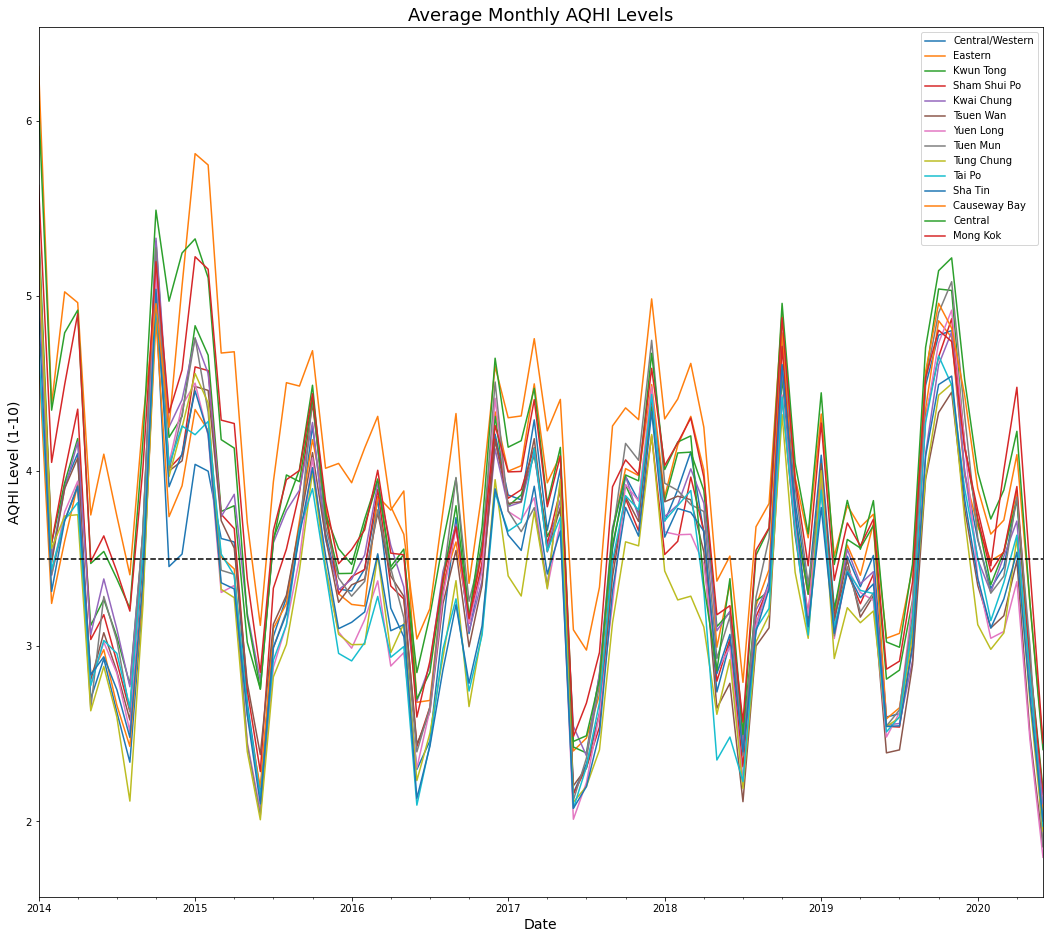

In [88]:
fig= monthly_avg.plot(figsize=(18,16)).get_figure()
plt.title('Average Monthly AQHI Levels', size=18)
plt.axhline(y=3.5, color='black', linestyle='--')
plt.ylabel('AQHI Level (1-10)', size=14)
plt.xlabel('Date', size=14)

fig.savefig(parent+'/visualizations/Average_monthly_aqhi_timeseries_all_districts.jpg')

The dashed line in the graph represents the boundary between 'low' and 'moderate' risk on the AQHI scale. As can be seen in the graph, the summer months have a seasonal drop in AQHI level. This suggests that summertime is a better time to visit for individuals who suffer from pollution irritated respiratory issues.